In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
mercancias_nav = pd.read_excel('data/Mercancias-RESUMEN.xlsx','RESUMEN')

mercancias_nav

,Año,Autoridad Portuaria,Operacion,Transito,Graneles líquidos,Graneles sólidos,TRÁFICO TOTAL,Unnamed: 7
0,1962,A Coruña,Desembarque,Incluido tránsito,204092.0,147137.0,540444,NaN
1,1962,A Coruña,Embarque,Incluido tránsito,6088.0,357934.0,658921,NaN
2,1963,A Coruña,Desembarque,Incluido tránsito,207576.0,165111.0,576053,NaN
3,1963,A Coruña,Embarque,Incluido tránsito,7328.0,351476.0,714987,NaN
4,1964,A Coruña,Desembarque,Incluido tránsito,1618225.0,201623.0,2047384,NaN
...,...,...,...,...,...,...,...,...
5708,2024,Sevilla,Total,Incluido tránsito,NaN,NaN,4272908,NaN
5709,2024,Tarragona,Total,Incluido tránsito,NaN,NaN,31858398,NaN
5710,2024,Valencia,Total,Incluido tránsito,NaN,NaN,81138594,NaN
5711,2024,Vigo,Total,Incluido tránsito,NaN,NaN,5681072,NaN


In [58]:
mercancias_nav = mercancias_nav[mercancias_nav['Autoridad Portuaria']!='C.A.G.P.']

mercancias_nav

,Año,Autoridad Portuaria,Operacion,Transito,Graneles líquidos,Graneles sólidos,TRÁFICO TOTAL,Unnamed: 7
0,1962,A Coruña,Desembarque,Incluido tránsito,204092.0,147137.0,540444,NaN
1,1962,A Coruña,Embarque,Incluido tránsito,6088.0,357934.0,658921,NaN
2,1963,A Coruña,Desembarque,Incluido tránsito,207576.0,165111.0,576053,NaN
3,1963,A Coruña,Embarque,Incluido tránsito,7328.0,351476.0,714987,NaN
4,1964,A Coruña,Desembarque,Incluido tránsito,1618225.0,201623.0,2047384,NaN
...,...,...,...,...,...,...,...,...
5708,2024,Sevilla,Total,Incluido tránsito,NaN,NaN,4272908,NaN
5709,2024,Tarragona,Total,Incluido tránsito,NaN,NaN,31858398,NaN
5710,2024,Valencia,Total,Incluido tránsito,NaN,NaN,81138594,NaN
5711,2024,Vigo,Total,Incluido tránsito,NaN,NaN,5681072,NaN


In [59]:
mercancias_nav = mercancias_nav[mercancias_nav['Transito'] != 'Solo tránsito']

# Agrupar por Año y Autoridad Portuaria y sumar las columnas relevantes
total_por_puerto_año = mercancias_nav.groupby(['Año', 'Autoridad Portuaria']).agg({
    'Graneles líquidos': 'sum',
    'Graneles sólidos': 'sum',
    'TRÁFICO TOTAL': 'sum'
}).reset_index()

# Renombrar las columnas para mayor claridad
total_por_puerto_año = total_por_puerto_año.rename(columns={
    'Graneles líquidos': 'Total Graneles líquidos',
    'Graneles sólidos': 'Total Graneles sólidos',
    'TRÁFICO TOTAL': 'Total Tráfico'
})

# Mostrar el resultado
total_por_puerto_año

,Año,Autoridad Portuaria,Total Graneles líquidos,Total Graneles sólidos,Total Tráfico
0,1962,A Coruña,210180.0,505071.0,1199365
1,1962,Alicante,148633.0,520412.0,1138566
2,1962,Almería,97697.0,905382.0,1098077
3,1962,Avilés,5343.0,3018542.0,3820664
4,1962,Bahía de Algeciras,17551.0,4185.0,227843
...,...,...,...,...,...
1770,2024,Sevilla,0.0,0.0,4272908
1771,2024,Tarragona,0.0,0.0,31858398
1772,2024,Valencia,0.0,0.0,81138594
1773,2024,Vigo,0.0,0.0,5681072


In [60]:
total_por_puerto_año =  pd.DataFrame(total_por_puerto_año)

total_por_puerto_año = total_por_puerto_año.sort_values(by=['Autoridad Portuaria', 'Año'])

total_por_puerto_año

,Año,Autoridad Portuaria,Total Graneles líquidos,Total Graneles sólidos,Total Tráfico
0,1962,A Coruña,210180.0,505071.0,1199365
29,1963,A Coruña,214904.0,516587.0,1291040
58,1964,A Coruña,2713338.0,780473.0,4040887
87,1965,A Coruña,3592453.0,501365.0,4632138
116,1966,A Coruña,4218362.0,424480.0,5090275
...,...,...,...,...,...
1662,2020,Vilagarcía,233458.0,314246.0,1209821
1690,2021,Vilagarcía,273548.0,425965.0,1511369
1718,2022,Vilagarcía,299566.0,401187.0,1498073
1746,2023,Vilagarcía,298398.0,571650.0,1552428


In [61]:
# Agrupar por Año y Autoridad Portuaria y sumar las columnas relevantes
total_por_año = mercancias_nav.groupby(['Año']).agg({
    'Graneles líquidos': 'sum',
    'Graneles sólidos': 'sum',
    'TRÁFICO TOTAL': 'sum'
}).reset_index()

# Renombrar las columnas para mayor claridad
total_por_año = total_por_año.rename(columns={
    'Graneles líquidos': 'Total Graneles líquidos',
    'Graneles sólidos': 'Total Graneles sólidos',
    'TRÁFICO TOTAL': 'Total Tráfico'
})

# Mostrar el resultado
total_por_año

,Año,Total Graneles líquidos,Total Graneles sólidos,Total Tráfico
0,1962,24520742.0,24034699.0,70096370
1,1963,28752576.0,23412218.0,75038928
2,1964,32098633.0,24600668.0,79802464
3,1965,36354156.0,25532125.0,87424042
4,1966,41337951.0,25025149.0,91211188
...,...,...,...,...
58,2020,166991115.0,77071496.0,515573698
59,2021,170857145.0,84980689.0,544419737
60,2022,181703616.0,93993780.0,561746178
61,2023,175279470.0,90547622.0,543611380


C:\Users\Francisco\AppData\Local\Temp\ipykernel_4216\3385718965.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', True)` for the same effect.

  sns.lineplot(


Text(0.5, 1.0, 'Evolución del tráfico marítimo (1962-2024)')

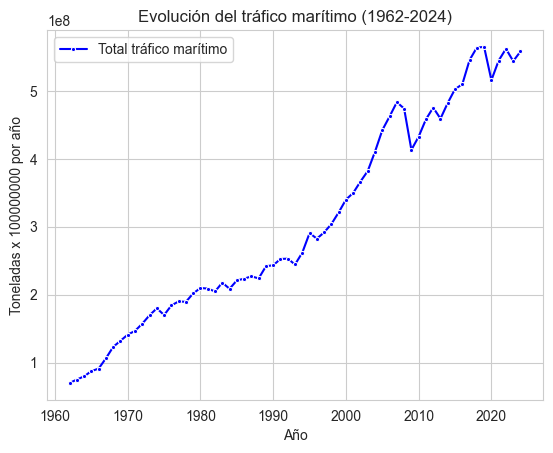

In [62]:
import seaborn as sns

sns.lineplot(
    data=total_por_año,
    x='Año',
    y='Total Tráfico',
    marker='.',
    color='blue',
    ci=True,  # Sin intervalos de confianza
    label= 'Total tráfico marítimo'
)
plt.grid(visible=True)
plt.ylabel("Toneladas x 100000000 por año")
plt.title('Evolución del tráfico marítimo (1962-2024)')

In [63]:
total_por_año['Crecimiento (%)'] = total_por_año['Total Tráfico'].pct_change() * 100

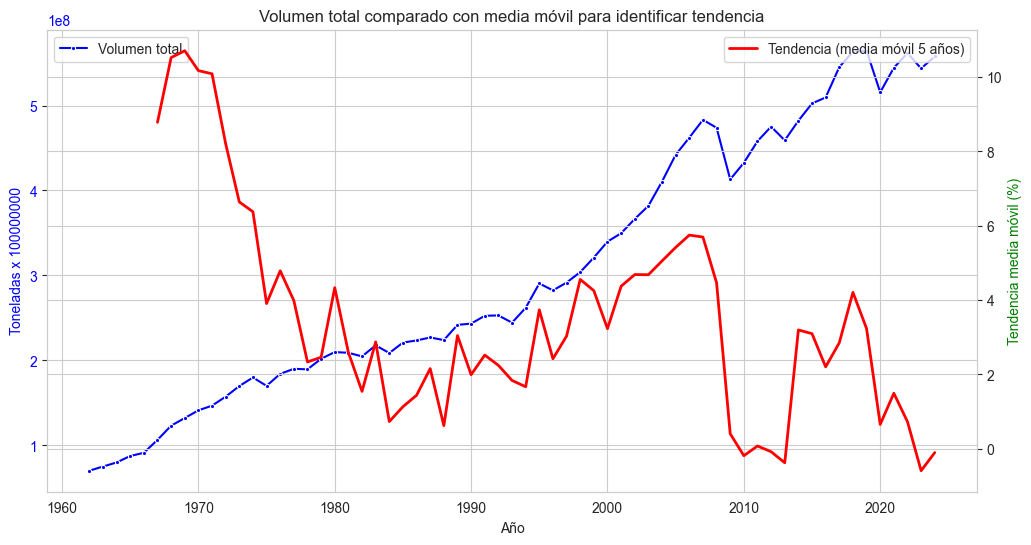

In [64]:
# Calcular media móvil de 5 años
total_por_año['Media móvil (5 años)'] = total_por_año['Crecimiento (%)'].rolling(5).mean()
fig, ax1 = plt.subplots(figsize=(12, 6))
# Gráfico
# Eje izquierdo: Volumen total
color = 'blue'
ax1.set_xlabel('Año')
ax1.set_ylabel('Toneladas x 100000000', color=color)
sns.lineplot(
    data=total_por_año,
    x='Año',
    y='Total Tráfico',
    marker='.',
    color=color,
    ax=ax1,
    label='Volumen total'
)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'green'
ax2.set_ylabel('Crecimiento con media movil (%)', color=color)
sns.lineplot(
    data=total_por_año,
    x='Año',
    y='Media móvil (5 años)',
    color='red',
    linewidth=2,
    label='Tendencia (media móvil 5 años)'
)
plt.title('Volumen total comparado con media móvil para identificar tendencia')
plt.ylabel('Tendencia media móvil (%)', color=color)
plt.xlabel('Año')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

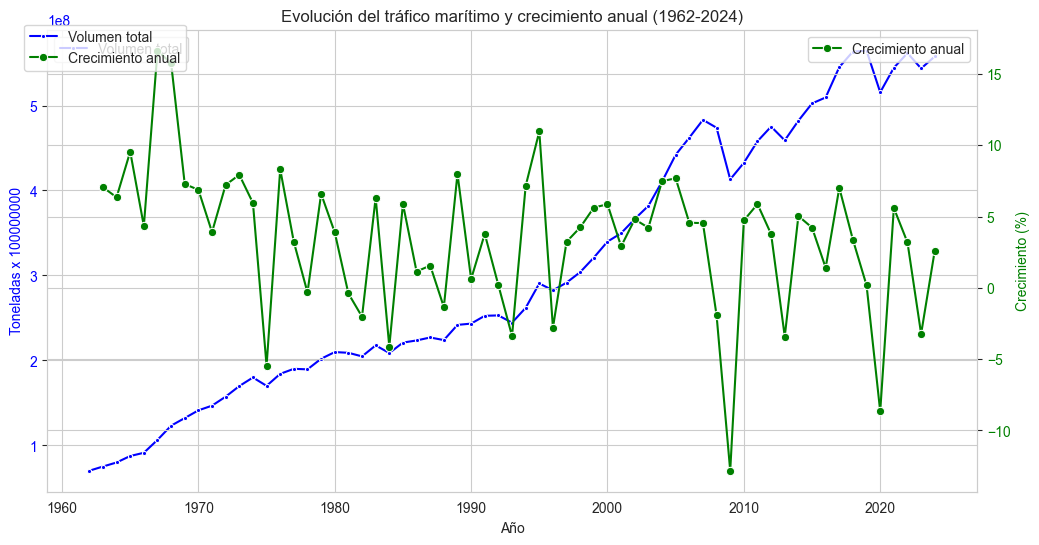

In [65]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Eje izquierdo: Volumen total
color = 'blue'
ax1.set_xlabel('Año')
ax1.set_ylabel('Toneladas x 100000000', color=color)
sns.lineplot(
    data=total_por_año,
    x='Año',
    y='Total Tráfico',
    marker='.',
    color=color,
    ax=ax1,
    label='Volumen total'
)
ax1.tick_params(axis='y', labelcolor=color)

# Eje derecho: Crecimiento porcentual
ax2 = ax1.twinx()
color = 'green'
ax2.set_ylabel('Crecimiento (%)', color=color)
sns.lineplot(
    data=total_por_año,
    x='Año',
    y='Crecimiento (%)',
    marker='o',
    color=color,
    ax=ax2,
    label='Crecimiento anual'
)
ax2.tick_params(axis='y', labelcolor=color)

# Título y grid
plt.title('Evolución del tráfico marítimo y crecimiento anual (1962-2024)')
ax1.grid(visible=True)
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.show()

Comparativa con otros paises

In [66]:
mercancias_mun = pd.read_excel('data/Mercancias_mundo.xlsx','Data', header=1)

mercancias_mun

,Country Name,Country Code,Region,2000,2001,2002,2003,2004,2005,2006,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Argentina,ARG,AMS,1144834.0,663811.0,554800.0,1025055.0,1251895.0,1490372.0,1757990.0,...,1.738744e+06,1.734397e+06,1.713267e+06,1.809153e+06,2.184625e+06,1.833964e+06,1.705390e+06,1798923.0,1667161.0,NaN
1,Austria,AUT,EU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.859000e+05,2.859000e+05,2.859000e+05,2.859000e+05,NaN,NaN,NaN,NaN,NaN,NaN
2,Bélgica,BEL,EU,5057579.0,5109693.0,5825610.0,6482443.0,7279638.0,7889994.0,8708293.0,...,9.895013e+06,1.005958e+07,1.032151e+07,1.078385e+07,1.150370e+07,1.238988e+07,1.269716e+07,13095258.0,12303822.0,NaN
3,Bulgaria,BGR,EU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.954560e+05,2.010500e+05,2.061110e+05,2.285450e+05,2.417160e+05,2.619340e+05,2.545710e+05,245160.0,254854.0,NaN
4,Suiza,CHE,SUIZA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.044820e+05,1.029160e+05,1.144980e+05,1.192310e+05,1.191330e+05,1.213660e+05,1.140750e+05,NaN,NaN,NaN
5,China,CHN,CHINA,41000000.0,44726084.0,55717488.0,61898336.0,74725444.0,67245263.0,84810503.0,...,1.872919e+08,1.955092e+08,2.028306e+08,2.187129e+08,2.291277e+08,2.375700e+08,2.404800e+08,256945700.0,268990000.0,NaN
6,Chipre,CYP,EU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.078780e+05,3.086390e+05,3.608410e+05,3.450160e+05,4.165020e+05,3.899620e+05,3.905040e+05,319131.0,371740.0,NaN
7,Alemania,DEU,EU,7695688.0,8426520.0,9252670.0,10943452.0,12479419.0,13598987.0,15009691.0,...,1.584260e+07,1.498824e+07,1.512637e+07,1.516347e+07,1.512322e+07,1.502239e+07,1.394621e+07,14710963.0,13733867.0,NaN
8,Dinamarca,DNK,EU,568660.0,457386.0,587300.0,888729.0,1213919.0,913960.0,679707.0,...,7.505980e+05,7.536430e+05,7.150760e+05,8.201390e+05,8.338570e+05,8.800390e+05,9.336220e+05,1054552.0,1079649.0,NaN
9,Estonia,EST,EU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.610690e+05,2.091540e+05,2.041770e+05,2.299050e+05,2.395760e+05,2.413380e+05,2.130000e+05,227000.0,288456.0,NaN


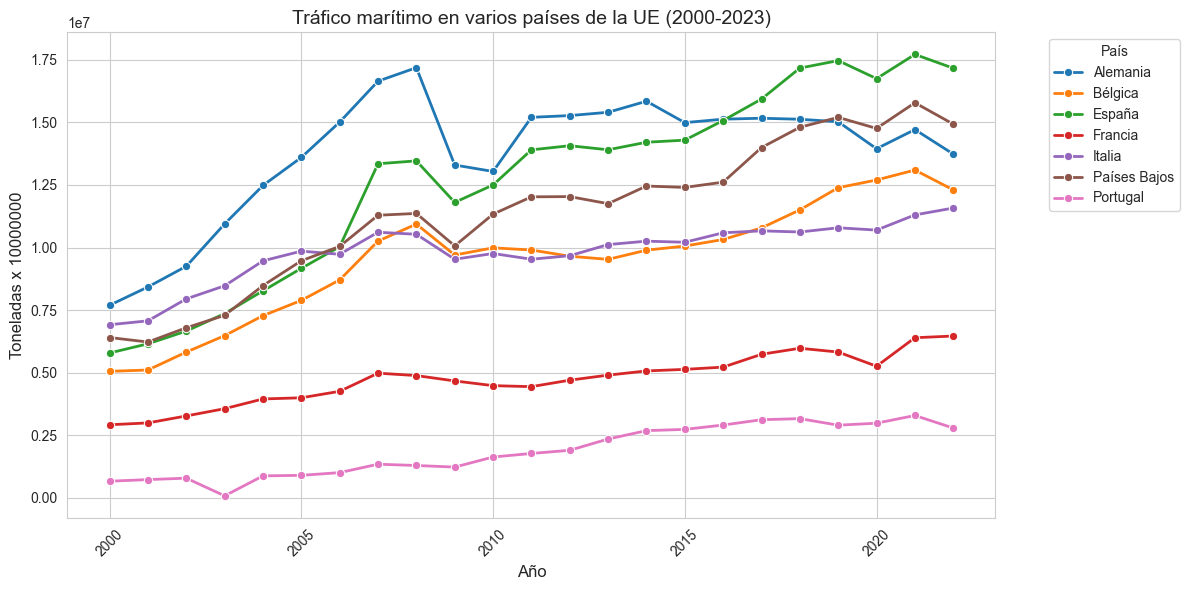

In [87]:
paises_seleccionados = ['Alemania', 'Portugal', 'Países Bajos', 'Bélgica','Italia', 'Francia', 'España']
df_filtrado = mercancias_mun[mercancias_mun['Country Name'].isin(paises_seleccionados)]

# Convertir años de columnas a filas (formato largo)
df_melted = df_filtrado.melt(
    id_vars=['Country Name'], 
    value_vars=mercancias_mun.columns[3:],  # Columnas de años (2000 a 2023)
    var_name='Año',
    value_name='Toneladas'
)
df_melted['Toneladas (millones)'] = df_melted['Toneladas']
# Convertir 'Año' a numérico y ordenar
df_melted['Año'] = df_melted['Año'].astype(int)
df_melted = df_melted.sort_values(by=['Country Name', 'Año'])
# Opcional: Convertir a millones de toneladas

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Crear el gráfico de líneas
sns.lineplot(
    data=df_melted,
    x='Año',
    y='Toneladas',  # O 'Toneladas' si no se escaló
    hue='Country Name',
    marker='o',
    linewidth=2,
    palette='tab10'  # Paleta de colores
)

# Personalizar el gráfico
plt.title('Tráfico marítimo en varios países de la UE (2000-2023)', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Toneladas x 10000000', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [91]:
import pandas as pd

# Países seleccionados (incluyendo "Unión Europea" como referencia)
paises_seleccionados = ['Alemania', 'Portugal', 'Países Bajos', 'Bélgica', 'Italia', 'Francia', 'España', 'Unión Europea']
df_filtrado = mercancias_mun[mercancias_mun['Country Name'].isin(paises_seleccionados)]

# Extraer datos de la UE (total de referencia)
ue_data = df_filtrado[df_filtrado['Country Name'] == 'Unión Europea'].drop(columns=['Country Name', 'Country Code', 'Region']).squeeze()

# Calcular la contribución porcentual de cada país respecto al total de la UE
df_contribucion = df_filtrado.copy()
for year in df_contribucion.columns[3:]:  # Columnas de años (2000-2023)
    df_contribucion[year] = df_contribucion[year] / ue_data[year] * 100  # Porcentaje

# Eliminar la fila de "Unión Europea" (ya no es necesaria)
df_contribucion = df_contribucion[df_contribucion['Country Name'] != 'Unión Europea']

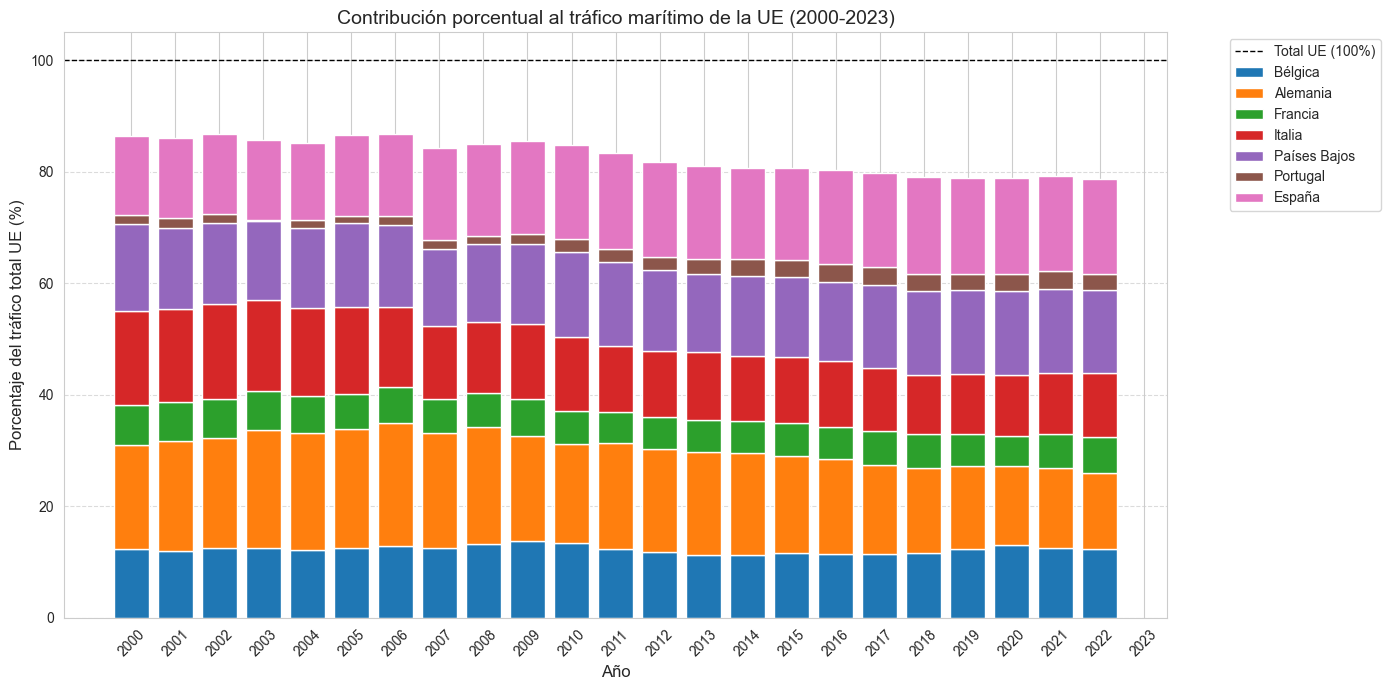

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Configurar años y países
años = df_contribucion.columns[3:].astype(int)
paises = df_contribucion['Country Name'].unique()

# Crear matriz de contribuciones (países x años)
contribuciones = df_contribucion.set_index('Country Name')[años.astype(str)].values

# Gráfico de barras apiladas
plt.figure(figsize=(14, 7))
colors = plt.cm.tab10.colors  # Paleta de colores

# Barras apiladas
bottom = np.zeros(len(años))
for idx, pais in enumerate(paises):
    plt.bar(
        años,
        contribuciones[idx],
        bottom=bottom,
        label=pais,
        color=colors[idx],
        edgecolor='white'
    )
    bottom += contribuciones[idx]

# Línea del 100% (total UE)
plt.axhline(y=100, color='black', linestyle='--', linewidth=1, label='Total UE (100%)')

# Personalización
plt.title('Contribución porcentual al tráfico marítimo de la UE (2000-2023)', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Porcentaje del tráfico total UE (%)', fontsize=12)
plt.xticks(años, rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [68]:
mercancias_nav_2000 = total_por_año[total_por_año['Año']>1999]

mercancias_nav_2000 = mercancias_nav_2000.loc[:,['Año', 'Total Tráfico']]

mercancias_nav_2000

,Año,Total Tráfico
38,2000,339789138
39,2001,349668173
40,2002,366460563
41,2003,381905957
42,2004,410469218
43,2005,441995210
44,2006,462163720
45,2007,483137210
46,2008,473822118
47,2009,413043813


In [69]:
df_pivoted = mercancias_nav_2000.set_index('Año').T.rename(index={'Total Tráfico': 'España'})
df_pivoted.index.name = 'País'

df_pivoted

Año,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
País,,,,,,,,,,,,,,,,,,,,,
España,339789138,349668173,366460563,381905957,410469218,441995210,462163720,483137210,473822118,413043813,...,502437978,509504623,545222364,563556572,564504053,515573698,544419737,561746178,543611380,557784250


Comparativa con otros transportes

In [71]:
mercancias_tot = pd.read_excel('data/Trafico_Total.xlsx','Hoja2')

mercancias_tot

,Unnamed: 0,Carretera,Ferroviario,Aéreo,Marítimo,Total
0,2007,2461112000,31272000,519000,483137210,2976040210
1,2008,2162133000,28447000,529000,473822118,2664931118
2,2009,1745430000,21924000,487000,413043813,2180884813
3,2010,1596912000,21438000,579000,432549687,2051478687
4,2011,1493878000,24144000,602000,457951102,1976575102
5,2012,1261640000,24406000,591000,475202616,1761839616
6,2013,1151755000,24321000,583000,458975555,1635634555
7,2014,1212999000,27392000,625000,482083933,1723099933
8,2015,1287963000,28450000,658000,502437978,1819508978
9,2016,1317122000,26618000,738000,509504623,1853982623


In [72]:
mercancias_tot =  mercancias_tot.rename(columns={'Unnamed: 0' : 'Año'})


In [73]:
mercancias_tot['Carretera %'] = round(((mercancias_tot['Carretera'] / mercancias_tot['Total']) * 100),2)
mercancias_tot['Marítimo %'] = round(((mercancias_tot['Marítimo'] / mercancias_tot['Total']) * 100),2)
mercancias_tot['Ferroviario %'] = round(((mercancias_tot['Ferroviario'] / mercancias_tot['Total']) * 100),2)
mercancias_tot['Aéreo %'] = round(((mercancias_tot['Aéreo'] / mercancias_tot['Total']) * 100),2)
mercancias_tot

,Año,Carretera,Ferroviario,Aéreo,Marítimo,Total,Carretera %,Marítimo %,Ferroviario %,Aéreo %
0,2007,2461112000,31272000,519000,483137210,2976040210,82.70,16.23,1.05,0.02
1,2008,2162133000,28447000,529000,473822118,2664931118,81.13,17.78,1.07,0.02
2,2009,1745430000,21924000,487000,413043813,2180884813,80.03,18.94,1.01,0.02
3,2010,1596912000,21438000,579000,432549687,2051478687,77.84,21.08,1.05,0.03
4,2011,1493878000,24144000,602000,457951102,1976575102,75.58,23.17,1.22,0.03
5,2012,1261640000,24406000,591000,475202616,1761839616,71.61,26.97,1.39,0.03
6,2013,1151755000,24321000,583000,458975555,1635634555,70.42,28.06,1.49,0.04
7,2014,1212999000,27392000,625000,482083933,1723099933,70.40,27.98,1.59,0.04
8,2015,1287963000,28450000,658000,502437978,1819508978,70.79,27.61,1.56,0.04
9,2016,1317122000,26618000,738000,509504623,1853982623,71.04,27.48,1.44,0.04


In [74]:
mercancias_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Año            17 non-null     int64  
 1   Carretera      17 non-null     int64  
 2   Ferroviario    17 non-null     int64  
 3   Aéreo          17 non-null     int64  
 4   Marítimo       17 non-null     int64  
 5   Total          17 non-null     int64  
 6   Carretera %    17 non-null     float64
 7   Marítimo %     17 non-null     float64
 8   Ferroviario %  17 non-null     float64
 9   Aéreo %        17 non-null     float64
dtypes: float64(4), int64(6)
memory usage: 1.5 KB


In [75]:
mercancias_tot_por = mercancias_tot.loc[:, ('Año', 'Carretera %', 'Marítimo %', 'Ferroviario %','Aéreo %')]
mercancias_tot_por =  mercancias_tot_por.rename(columns={'Carretera %' : 'Carretera', 'Marítimo %': 'Maritimo', 'Ferroviario %': 'Ferroviario ','Aéreo %':'Aéreo'})
mercancias_tot_por

,Año,Carretera,Maritimo,Ferroviario,Aéreo
0,2007,82.70,16.23,1.05,0.02
1,2008,81.13,17.78,1.07,0.02
2,2009,80.03,18.94,1.01,0.02
3,2010,77.84,21.08,1.05,0.03
4,2011,75.58,23.17,1.22,0.03
5,2012,71.61,26.97,1.39,0.03
6,2013,70.42,28.06,1.49,0.04
7,2014,70.40,27.98,1.59,0.04
8,2015,70.79,27.61,1.56,0.04
9,2016,71.04,27.48,1.44,0.04


<Figure size 1100x600 with 0 Axes>

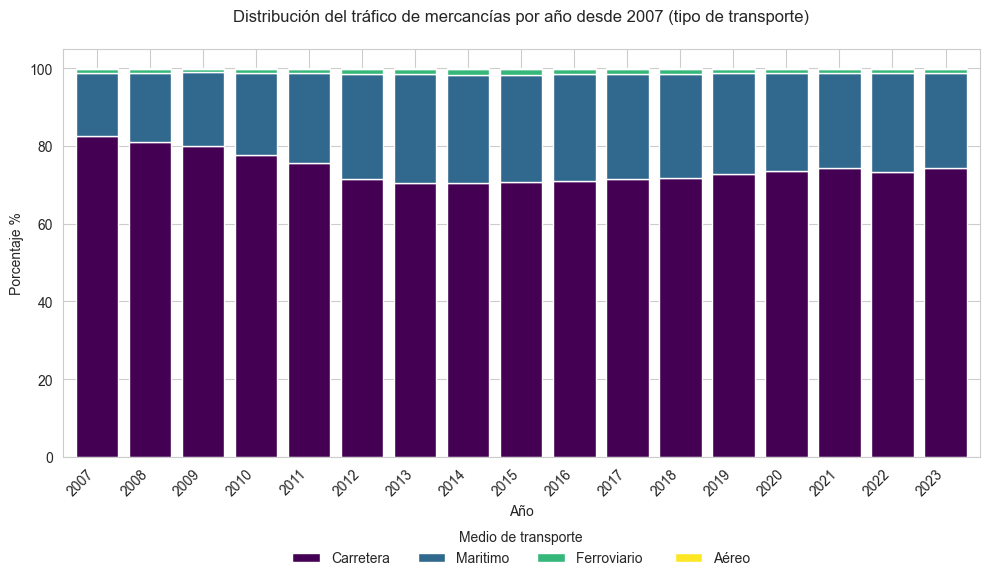

In [76]:
merc_melt = mercancias_tot_por.set_index('Año')

# 2. Crear el gráfico apilado
plt.figure(figsize=(11, 6))

# Gráfico de barras apiladas
merc_melt.plot(
    figsize=(10,6),
    kind='bar',
    stacked=True,
    colormap='viridis',  # Paleta de colores
    edgecolor='white',
    width=0.8  # Ancho de las barras
)

# Personalización
plt.title("Distribución del tráfico de mercancías por año desde 2007 (tipo de transporte)", pad=20)
plt.ylabel(r"Porcentaje %")
plt.xlabel("Año")
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje X

# Leyenda compacta y abajo
plt.legend(
    title="Medio de transporte",
    bbox_to_anchor=(0.5, -0.15),
    loc='upper center',
    ncol=4,
    fontsize='10',
    frameon=False
)

# Ajustar márgenes para que quepan las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [77]:
mercancias_car = mercancias_tot.loc[:, ('Año', 'Carretera')]

mercancias_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Año        17 non-null     int64
 1   Carretera  17 non-null     int64
dtypes: int64(2)
memory usage: 404.0 bytes


In [78]:
mercancias_aer = mercancias_tot.loc[:, ('Año', 'Aéreo')]

mercancias_aer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Año     17 non-null     int64
 1   Aéreo   17 non-null     int64
dtypes: int64(2)
memory usage: 404.0 bytes


In [79]:
mercancias_fer = mercancias_tot.loc[:, ('Año', 'Ferroviario')]

mercancias_fer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Año          17 non-null     int64
 1   Ferroviario  17 non-null     int64
dtypes: int64(2)
memory usage: 404.0 bytes


C:\Users\Francisco\AppData\Local\Temp\ipykernel_4216\3308498187.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', True)` for the same effect.

  sns.lineplot(
C:\Users\Francisco\AppData\Local\Temp\ipykernel_4216\3308498187.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', True)` for the same effect.

  sns.lineplot(
C:\Users\Francisco\AppData\Local\Temp\ipykernel_4216\3308498187.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', True)` for the same effect.

  sns.lineplot(
C:\Users\Francisco\AppData\Local\Temp\ipykernel_4216\3308498187.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', True)` for the same effect.

  sns.lineplot(


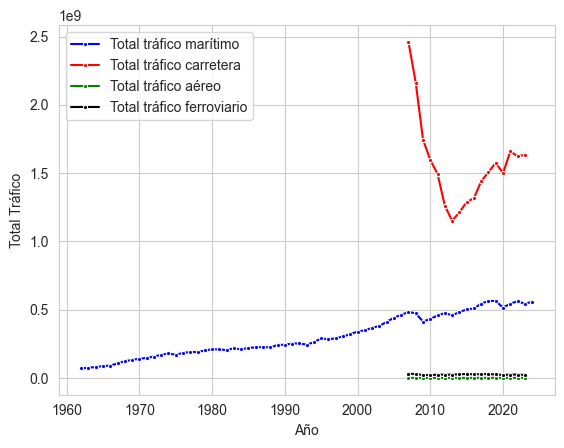

In [80]:
import seaborn as sns

sns.lineplot(
    data=total_por_año,
    x='Año',
    y='Total Tráfico',
    marker='.',
    color='blue',
    ci=True,  # Sin intervalos de confianza
    label= 'Total tráfico marítimo'
)
sns.lineplot(
    data=mercancias_car,
    x='Año',
    y='Carretera',
    marker='.',
    color='red',
    ci=True,  # Sin intervalos de confianza
    label= 'Total tráfico carretera'
)
sns.lineplot(
    data=mercancias_aer,
    x='Año',
    y='Aéreo',
    marker='.',
    color='green',
    ci=True,  # Sin intervalos de confianza
    label= 'Total tráfico aéreo'
)
sns.lineplot(
    data=mercancias_fer,
    x='Año',
    y='Ferroviario',
    marker='.',
    color='black',
    ci=True,  # Sin intervalos de confianza
    label= 'Total tráfico ferroviario'
)

plt.grid(visible=True)